# Final Project: Regression Analysis

#### **Author**: Brett Vrtachnik
#### **Date**: 4/19/2025
#### **Introduction**: This project uses regression analysis to predict insurance charges based on age, Body Mass Index (BMI), and smoking status

## Section 1. Import and Inspect the Data

### Import Dependencies

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

### 1.1 Load the Dataset and Display the First 10 Rows

In [29]:
df = pd.read_csv(r'C:\Projects\ml_regression\data\insurance.csv', header=0)

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for Missing Values and Display Summary Statistics

In [30]:
# Check for missing values
print(df.isnull().sum())
print('\n' + '_'*50 + '\n')

# Summary statistics
print(df.describe(include='all'))
print('\n' + '_'*50 + '\n')

# Check the data types of the columns
print(df.dtypes)



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

__________________________________________________

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.1

#### Reflection 1

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

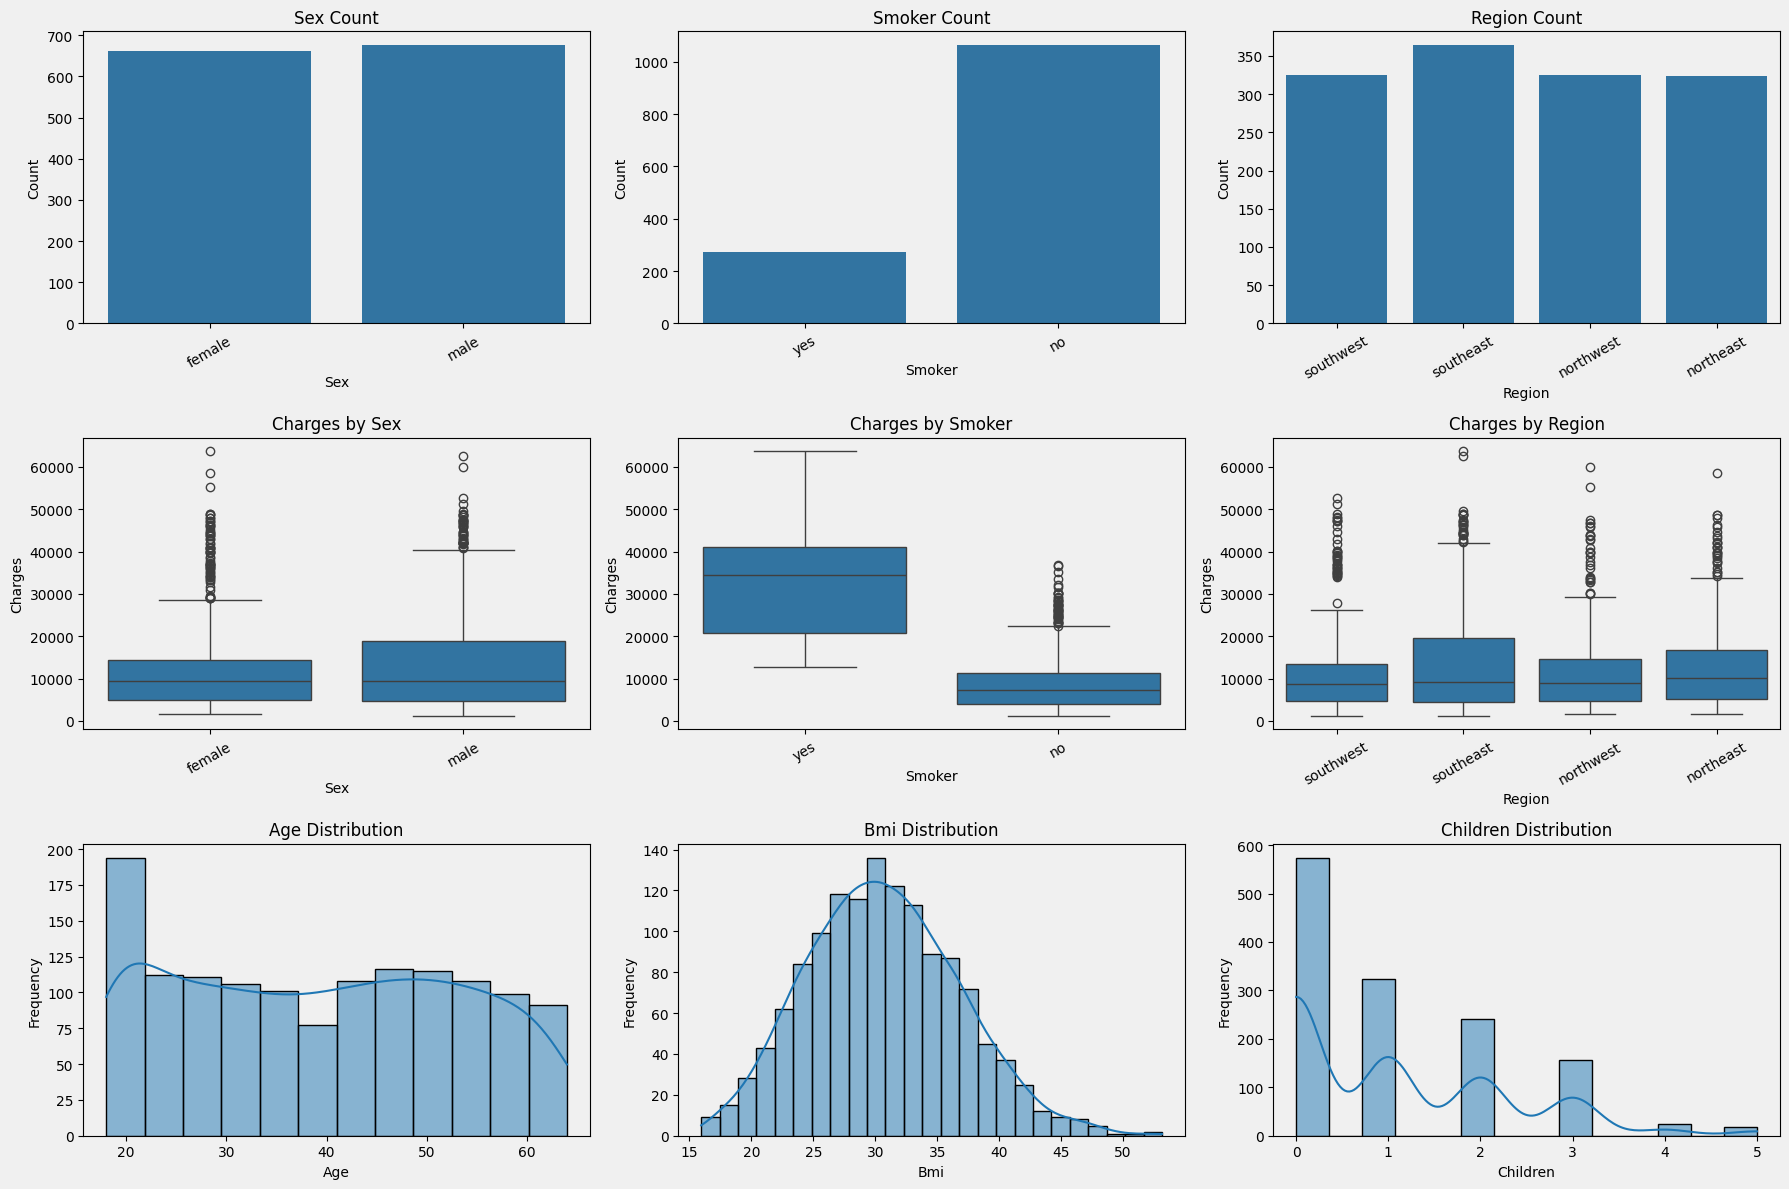

In [31]:
# Categorical variables for countplots and boxplots
categorical_cols = ['sex', 'smoker', 'region']

# Numeric columns for histograms
numeric_cols = ['age', 'bmi', 'children', 'charges']

# Set up a 3-row subplot grid (countplot, boxplot, histogram)
fig, axes = plt.subplots(3, len(categorical_cols), figsize=(18, 12))

# Row 1: Countplots for categorical features
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[0, i])
    axes[0, i].set_title(f"{col.capitalize()} Count")
    axes[0, i].set_xlabel(col.capitalize())
    axes[0, i].set_ylabel("Count")
    axes[0, i].tick_params(axis='x', rotation=30)

# Row 2: Boxplots to compare charges across categories
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='charges', ax=axes[1, i])
    axes[1, i].set_title(f"Charges by {col.capitalize()}")
    axes[1, i].set_xlabel(col.capitalize())
    axes[1, i].set_ylabel("Charges")
    axes[1, i].tick_params(axis='x', rotation=30)

# Row 3: Histograms for numerical features (kde overlay just to visualize distribution shape)
for i, col in enumerate(numeric_cols[:len(categorical_cols)]):  # limit to same number of columns as above
    sns.histplot(data=df, x=col, kde=True, ax=axes[2, i])
    axes[2, i].set_title(f"{col.capitalize()} Distribution")
    axes[2, i].set_xlabel(col.capitalize())
    axes[2, i].set_ylabel("Frequency")

# Clean up any extra axes (if num of numeric cols < num of subplots)
if len(numeric_cols) < len(categorical_cols):
    for j in range(len(numeric_cols), len(categorical_cols)):
        fig.delaxes(axes[2, j])

plt.tight_layout()
plt.show()

### 2.2 Handle Missing Values and Clean Data

#### Handling Missing Values
- No missing values were found in this dataset. If there were, numeric columns would be imputed with the median and categorical with the mode.

In [32]:
# Check for missing values in each column
df.isnull().sum()



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Encode Categorical Features

We applied one-hot encoding to convert the categorical features (`sex`, `smoker`, and `region`) into numerical format. 
This is necessary for regression models, which require all input features to be numeric.


In [33]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Check data types to confirm encoding
print(df_encoded.dtypes)



age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


## Section 3. Feature Selection and Justification

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

- **Input features**: age, bmi, smoker_yes  
- **Target feature**: charges (total medical cost billed to the individual)


### 3.2 Define X and y 

In [34]:
# Define X and y using selected features
X = df_encoded[['age', 'bmi', 'smoker_yes']]
y = df_encoded['charges']



#### Section 3 Reflection

I selected `age`, `bmi`, and `smoker_yes` because they appear to have the strongest relationships with `charges`. 
These features make sense conceptually — older individuals, those with higher BMI, and smokers are likely to have higher medical costs. 
Including these features gives the model a clearer signal without adding unnecessary complexity.


## Section 4. Train a Regression Model **(Linear Regression)**


### 4.1 Split the data into training and test sets

In [35]:
# Simple 80/20 random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 4.2 Create and Train Model (Linear Regression)

We trained a linear regression model using the training data. This model attempts to predict insurance charges based on age, BMI, and smoking status.


In [36]:
# Create and train the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### 4.3 Predict and Evaluate Model Performance

In [37]:
# Make predictions on the test set
y_pred = linreg.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.7961
Mean Absolute Error (MAE): 4136.42
Root Mean Squared Error (RMSE): 5583.31


#### Reflection 4

The linear regression model showed a moderate level of performance. The R² score indicated that the model was able to explain a fair portion of the variance in insurance charges, though not all. The MAE and RMSE values suggest that the model’s predictions were off by a few thousand dollars on average, which makes sense given how variable medical costs can be. 

There were no major surprises, but it did stand out that smoker status had a strong impact on predicted charges. This aligns with expectations, as smoking is known to significantly increase health risks and medical expenses. Overall, the model gives a reasonable baseline, but I expect better performance from more complex approaches in the next section.


## Section 5: Try an Alternative Model (**Random Forest**)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression

This pipeline handles missing values (if any), scales the features, and fits a linear regression model.


In [38]:
pipe1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe1.fit(X_train, y_train)
y_pred_pipe1 = pipe1.predict(X_test)

### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

This pipeline adds polynomial features to capture nonlinear relationships before scaling and fitting the regression model.


In [39]:
pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe2.fit(X_train, y_train)
y_pred_pipe2 = pipe2.predict(X_test)




### Random Forest Regressor

We also trained a Random Forest Regressor as a nonlinear model to compare against both linear approaches. Random Forest is useful for capturing complex interactions without requiring feature scaling.


In [40]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_test_pred_rf = rf_model.predict(X_test)

### 5.3 Compare Performance of All Models

We compared the performance of all models — the basic linear regression, the random forest regressor, and both pipelines — using R², MAE, and RMSE to determine which model predicted medical charges most accurately.


In [41]:
# Baseline linear regression was already evaluated earlier
print("Baseline Linear Regression:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Random Forest — predict and evaluate
y_test_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_test_pred_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("\nRandom Forest Regressor:")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

# Pipeline 1 evaluation
print("\nPipeline 1 (Imputer → Scaler → Linear Regression):")
print(f"R²: {r2_score(y_test, y_pred_pipe1):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_pipe1):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_pipe1)):.2f}")

# Pipeline 2 evaluation
print("\nPipeline 2 (Polynomial Features → Scaler → Linear Regression):")
print(f"R²: {r2_score(y_test, y_pred_pipe2):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_pipe2):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_pipe2)):.2f}")


Baseline Linear Regression:
R²: 0.7961
MAE: 4136.42
RMSE: 5583.31

Random Forest Regressor:
R²: 0.8725
MAE: 2584.03
RMSE: 4414.90

Pipeline 1 (Imputer → Scaler → Linear Regression):
R²: 0.7961
MAE: 4136.42
RMSE: 5583.31

Pipeline 2 (Polynomial Features → Scaler → Linear Regression):
R²: 0.9032
MAE: 2563.74
RMSE: 3847.75


#### Section 5 Reflection

The Random Forest Regressor and the Polynomial Features pipeline both outperformed the basic linear regression models. The Random Forest had a higher R² and lower error values, showing that it was better at capturing nonlinear relationships in the data. Adding polynomial features also improved the performance significantly, but not as much as the Random Forest. This suggests that scaling and feature engineering help, but tree-based models like Random Forest can naturally handle complexity without needing much preprocessing.


## 6. Final Thoughts & Insights

#### 6.1 Summarize Findings

This project used the Medical Cost dataset to predict individual insurance charges based on features like age, BMI, and smoking status. After testing several models, the Random Forest Regressor and the polynomial pipeline both outperformed the baseline linear regression. These results showed that incorporating nonlinearity and model complexity can lead to better predictive performance on real-world data.

#### 6.2 Discuss Challenges Faced

One of the main challenges was deciding how to handle categorical features and when scaling was necessary. Another challenge was understanding how different preprocessing steps (like polynomial transformations) would affect the model and when they were worth using. It also took a few tries to set up pipelines correctly and evaluate all models consistently.

#### 6.3 If You Had More Time, What Would You Try Next?

If I had more time, I would try using different models to see if any perform better than the ones I used. I’d also try to add more features to see if that improves predictions. It would be interesting to look at which features have the biggest impact on the results.

### Reflection 6

This project helped reinforce the core workflow of a regression task — from data exploration and preprocessing to modeling and evaluation. I got more comfortable using pipelines and comparing model performance using metrics like R², MAE, and RMSE. The project also highlighted how impactful a single feature like smoker status can be in a real dataset.
